# Movie Review Sentiment Analysis

Descrition :- Implimentation of NLTK librery to check whether given movie review is positive or negative

DataSource:- Data obtained from in-build nltk lib. which contains 1000 negative & 1000 positive reviews

1) Importing Required Modules

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# for displying graphs within execution window
% matplotlib inline

In [2]:
# downloading moview_reviews data from nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\kaushiki\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [3]:
from nltk.corpus import movie_reviews as mr    #importing movie_review data as mr

In [4]:
#To process data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  
stop_words=set(nltk.corpus.stopwords.words('english'))    #To remove stopwords


from nltk import word_tokenize,sent_tokenize  # for tokenization
from nltk.stem import PorterStemmer   #for stemming
from nltk.stem.snowball import SnowballStemmer   #stemming

#To download wordnet lemmitizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


#for part of speech tagging
from nltk import pos_tag

#for vectorization
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#importing different different machine-learning modules
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression


#To split data into train & test
from sklearn.model_selection import train_test_split,cross_validate

#for hyperparameter tunning
from sklearn.model_selection import GridSearchCV

#for calculation of performer metric
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report
from sklearn.metrics import confusion_matrix

#pre-processing sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaushiki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaushiki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2) Preparing data in required format

This Movie_review data downloaded with two folders. one for positive review(pos) & another one is for negative review(neg)so i have first got all the file-names(both positive & negative) using 'fileids' and then iterated over each review file 
and stored its text into two different lists(one for +ve & another for -ve)

In [5]:
file_ids=mr.fileids()
print(file_ids)

['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt', 'neg/cv010_29063.txt', 'neg/cv011_13044.txt', 'neg/cv012_29411.txt', 'neg/cv013_10494.txt', 'neg/cv014_15600.txt', 'neg/cv015_29356.txt', 'neg/cv016_4348.txt', 'neg/cv017_23487.txt', 'neg/cv018_21672.txt', 'neg/cv019_16117.txt', 'neg/cv020_9234.txt', 'neg/cv021_17313.txt', 'neg/cv022_14227.txt', 'neg/cv023_13847.txt', 'neg/cv024_7033.txt', 'neg/cv025_29825.txt', 'neg/cv026_29229.txt', 'neg/cv027_26270.txt', 'neg/cv028_26964.txt', 'neg/cv029_19943.txt', 'neg/cv030_22893.txt', 'neg/cv031_19540.txt', 'neg/cv032_23718.txt', 'neg/cv033_25680.txt', 'neg/cv034_29446.txt', 'neg/cv035_3343.txt', 'neg/cv036_18385.txt', 'neg/cv037_19798.txt', 'neg/cv038_9781.txt', 'neg/cv039_5963.txt', 'neg/cv040_8829.txt', 'neg/cv041_22364.txt', 'neg/cv042_11927.txt', 'neg/cv043_16808.t

In [6]:
neg_rev=[]
pos_rev=[]

#for negative reviews
for file in file_ids[:1000]:
    rev=str(mr.raw(file))
    neg_rev.append(rev)
    
#for positive reviews
for file in file_ids[1000:]:
    rev=str(mr.raw(file))
    pos_rev.append(rev)

In [7]:
#printing length
print(len(pos_rev))
print(len(neg_rev))

1000
1000


In [8]:
# just a  positive review
print(pos_rev[0])

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

Now we have arrays with reviews so here we need to add sentiments against reviews so that we can identify positive & negative reviews for this we need to create corresponding arrays to store labels.

In [9]:
# creating corresponding labels to store labels

pos_label=[]
neg_label=[]
i=0
for i in range(len(pos_rev)):
    pos_label.append("Positive")
i=0
for i in range(len(neg_rev)):
    neg_label.append("Negative")

In [10]:
# Convert them into pandasData frame


# getting data frames from the arrays
i=0
index=[]
for i in range(1000):
    index.append(i)
pos_df=pd.DataFrame(index=index,columns=['Review','Sentiment'])
neg_df=pd.DataFrame(index=index,columns=['Review','Sentiment'])

In [11]:

i=0
for i  in range(1000):
    rev=pos_rev[i]
    pos_df.loc[i,'Review']=rev
    pos_df.loc[i,'Sentiment']=pos_label[i]
i=0   
for i  in range(1000):
    rev=neg_rev[i]
    neg_df.loc[i,'Review']=rev
    neg_df.loc[i,'Sentiment']=neg_label[i]

In [12]:
pos_df.head(5)

,Review,Sentiment
0,films adapted from comic books have had plenty...,Positive
1,every now and then a movie comes along from a ...,Positive
2,you've got mail works alot better than it dese...,Positive
3,""" jaws "" is a rare film that grabs your atten...",Positive
4,moviemaking is a lot like being the general ma...,Positive


In [13]:
neg_df.head(5)

,Review,Sentiment
0,"plot : two teen couples go to a church party ,...",Negative
1,the happy bastard's quick movie review \ndamn ...,Negative
2,it is movies like these that make a jaded movi...,Negative
3,""" quest for camelot "" is warner bros . ' firs...",Negative
4,synopsis : a mentally unstable man undergoing ...,Negative


To combining positive & negative reviews 

In [14]:
df=pd.concat([pos_df,neg_df],ignore_index=True)

In [15]:
print(df.shape)
df.head(5)

(2000, 2)


,Review,Sentiment
0,films adapted from comic books have had plenty...,Positive
1,every now and then a movie comes along from a ...,Positive
2,you've got mail works alot better than it dese...,Positive
3,""" jaws "" is a rare film that grabs your atten...",Positive
4,moviemaking is a lot like being the general ma...,Positive


In [16]:
df.tail(5)

,Review,Sentiment
1995,"if anything , "" stigmata "" should be taken as ...",Negative
1996,"john boorman's "" zardoz "" is a goofy cinematic...",Negative
1997,the kids in the hall are an acquired taste . \...,Negative
1998,there was a time when john carpenter was a gre...,Negative
1999,two party guys bob their heads to haddaway's d...,Negative


Pre-Processing 

1) Stopwords
creating list of english stopwords

In [17]:
stop_words=set(nltk.corpus.stopwords.words('english'))
print(stop_words)

{'these', 'here', 'from', 'until', 'after', 'being', 'once', 'few', 'between', "needn't", 'have', 'such', "it's", 'didn', 'needn', 'yourselves', 'he', 'will', 'most', 'your', 'd', 'or', "don't", 'itself', 'to', 'further', 'how', 'if', 're', "that'll", 'having', 'where', 'y', 'nor', 't', 'during', 'shouldn', 'more', 'at', 'all', 'there', 'very', 'any', "isn't", 'themselves', 'a', 'just', 'on', 'haven', 'been', 'ours', 'out', 'than', 'under', "aren't", 'but', 'own', 'ourselves', 'about', 'above', 'our', "shouldn't", 'with', 'through', 'were', 'of', 'won', 'that', "should've", 'i', 've', 'weren', "you'd", 'do', 'wouldn', 'herself', 'they', 'as', 'over', "hasn't", 'be', 'shan', 'his', 'are', 'whom', 'him', 'who', 'it', 'did', 'ma', 'so', 'yours', 'we', "she's", 'too', 'its', 'her', 'some', "you'll", 'was', 'aren', 'had', 'and', 'ain', 'am', 'only', 'me', 'she', 'an', 'm', "won't", 'theirs', 'don', 'them', "hadn't", "shan't", 'by', 'yourself', 'hadn', 'when', "haven't", 'hasn', "mightn't", 

2) Stemming/Lemmitization

In [18]:
i=0
lem=WordNetLemmatizer()
for str in df['Review']:
    tokens=word_tokenize(str)
    temp=set()
    for token in tokens:
        stem_token=lem.lemmatize(token)
        temp.add(stem_token)
    temp_str=" ".join(temp)
    df.loc[i,"Review"]=temp_str
    i=i+1

In [19]:
print(df.shape)
df.head()

(2000, 2)


,Review,Sentiment
0,direct surroundings worry footnote named polic...,Positive
1,contains darling anti-social once side _ferris...,Positive
2,contains from small block course extremely cor...,Positive
3,alien-like produced scheider once police named...,Positive
4,value base being once worry general named poli...,Positive


In [20]:
print(df.shape)
df.tail()

(2000, 2)


,Review,Sentiment
1995,similarly-themed screaming being once cover wo...,Negative
1996,sneak these status old-style infallibility ero...,Negative
1997,cable longer advancement from strangely after ...,Negative
1998,name here from until -clever course number sta...,Negative
1999,back these from lazy steve grieco after featur...,Negative


Here, We create features from our reviews so that we can pass it to machine learning algorithm , Here i have used Tfidf vectoriser to compute TF-IDF(Term Frequency - Inverse document frequency) for each of word in document it will tell you how important that perticular word in document.

In [21]:
vect =TfidfVectorizer(stop_words=stop_words)
X=vect.fit_transform(df['Review'])
Y=df['Sentiment']

In [22]:
#Creating dataframe from extracted features will give you document term matrix.
dtm=pd.DataFrame(X.toarray(), columns=vect.get_feature_names()) 
le=LabelEncoder()
dtm['Sentiment']=le.fit_transform(df['Sentiment'])

In [23]:
print(dtm.shape)
dtm.head(8)

(2000, 35448)


,00,000,0009f,007,00s,03,04,05,05425,10,...,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz,Sentiment
0,0.07535,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.00000,0.044137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Splitting Data into Training & Validation Sets

In [26]:
x_train,x_test,y_train,y_test=train_test_split(dtm.drop(['Sentiment'],axis=1),dtm['Sentiment'],test_size=0.20,random_state=42)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 35447)
(400, 35447)
(1600,)
(400,)


Buidling Model using different machine learning algorith (& Select best one at the end)

1) Logistic Regression

In [43]:
log_reg=LogisticRegression(C=150)
log_reg.fit(x_train,y_train)
pred=log_reg.predict(x_test)
print("The accuracy of Logistic Regression :" , accuracy_score(pred,y_test)) 
print("The classification report is : \n"+classification_report(pred,y_test))

The accuracy of Logistic Regression : 0.855
The classification report is : 
             precision    recall  f1-score   support

          0       0.87      0.85      0.86       205
          1       0.84      0.86      0.85       195

avg / total       0.86      0.85      0.86       400



[[174  27]
 [ 31 168]]


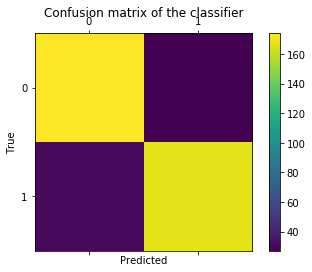

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

2) Gaussian Neive Bayes

In [51]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print("The accuracy of Gaussian Naive Bayes :" , accuracy_score(pred,y_test)) 
print("The classification report is : \n"+classification_report(pred,y_test))

The accuracy of Gaussian Naive Bayes : 0.62
The classification report is : 
             precision    recall  f1-score   support

          0       0.52      0.65      0.58       159
          1       0.72      0.60      0.65       241

avg / total       0.64      0.62      0.62       400



[[104  97]
 [ 55 144]]


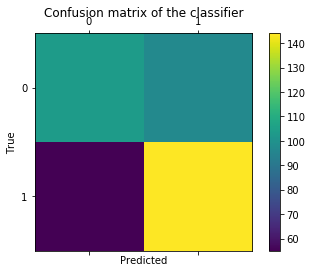

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

3) Multinominal Neive Bayes

In [47]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)
print("The accuracy of Multinomial Naive Bayes :" , accuracy_score(pred,y_test)) 
print("The classification report is : \n"+classification_report(pred,y_test))

The accuracy of Multinomial Naive Bayes : 0.84
The classification report is : 
             precision    recall  f1-score   support

          0       0.81      0.86      0.84       189
          1       0.87      0.82      0.84       211

avg / total       0.84      0.84      0.84       400



[[163  38]
 [ 26 173]]


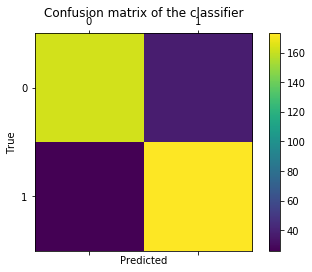

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()